<a href="https://colab.research.google.com/github/nicabey/Numerical-Methods/blob/main/Project_6_CPSMA_4133.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Project 6 - Regression
Numerical Methods

Dr. Jacob

Nichole Beyer, Laxman Bista 



Linear Regression is a basic and commonly used type of predictive analysis. The overall idea of regression is to examine two things: <br>
- Does a set of predictor variables do a good job in predicting an outcome variable
- Which variables in particular are significant predictors of the outcome variable and in what way do they indicated by the magnitude and sign of the beta estimates impact the outcome variable.

In simple words regression is the relationship between dependent variable and independent variables.


In [1]:
# Packages

import numpy as np    #array processing package
from scipy import stats     #used for scientific calculations
import matplotlib.pyplot as plt     #used to plot the data 
import pandas as pa    #used to add datastructures

%matplotlib inline #sets the backend of matplotlib to the 'inline' backend

UsageError: unrecognized arguments: #sets the backend of matplotlib to the 'inline' backend


# DATA
We are fetching raw data from the github repository of one of our group members, Nichole Beyer. She retrevied the dataset from https://www.hockey-reference.com/teams/WSH/skaters.html  on 2/20/2020. 
<br> 
Here, we are trying to show the relationship between Goals, Assists and Points. Here Goals and Assists are independent variables whereas points is a dependent variable.
<br>
<br>
All in all, linear regression is the relationship between independent variables and dependent variable.
<br>
We are fetching data from this github link: https://raw.githubusercontent.com/nicabey/Numerical-Methods/main/Capitals%20all%20time%20.csv


In [3]:
data = pa.read_csv('https://raw.githubusercontent.com/nicabey/Numerical-Methods/main/Capitals%20all%20time%20.csv')

In [4]:
data


,Rk,Player,From,To,Yrs,GP,G,A,PTS,+/-,PIM,EV,PP,SH,GW,EV.1,PP.1,SH.1,S,S%,TOI,ATOI
0,1,Keith Acton,1994,1994,1,6,0,0,0,-4,21,0,0,0,0,0,0,0,2,0.0,NaN,NaN
1,2,Greg Adams,1984,1988,5,330,55,98,153,37,694,47,8,0,3,77,21,0,450,12.2,NaN,NaN
2,3,Jason Allison,1994,1997,4,86,7,22,29,-8,33,4,3,0,1,15,7,0,103,6.8,NaN,NaN
3,4,Karl Alzner,2009,2017,9,591,19,98,117,61,177,19,0,0,2,94,2,2,529,3.6,11939.0,20:12
4,5,Murray Anderson,1975,1975,1,40,0,1,1,-40,68,0,0,0,0,1,0,0,23,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,495,Bryan Watson,1977,1979,3,155,4,26,30,-25,294,3,0,1,0,26,0,0,125,3.2,NaN,NaN
495,496,Mike Weber,2016,2016,1,10,0,0,0,-1,28,0,0,0,0,0,0,0,12,0.0,140.0,13:59
496,497,Casey Wellman,2014,2014,1,13,2,1,3,3,0,2,0,0,0,1,0,0,15,13.3,122.0,9:22
497,498,Patrick Wey,2014,2014,1,9,0,3,3,0,5,0,0,0,0,3,0,0,5,0.0,131.0,14:35


# Plotting Data
Here,
<br>
G: Goals
<br>
A: Assists
<br>
PTS: Points
<br>
Let's show the relationship between G, A, and PTS 

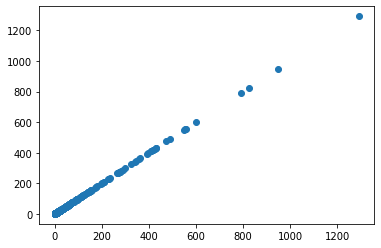

In [86]:
plt.scatter(data["G"] + data["A"], data["PTS"]);

Correlation

Correlation quantify the association between variables or features of a dataset.
The pearsonr() Scipy function can be used to calculate the Pearson's correlation coefficient between two data samples.
Syntax: scipy.stats.pearsonr(x, y)


Now lets demonstrate graphically the relationship between Power Plays (PP) and Points. I would assume there will be a strong correllation between power plays and points.

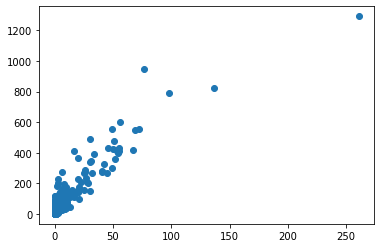

In [88]:
plt.scatter(data["PP"],data["PTS"])

In [7]:
stats.pearsonr(data["PP"],data["Rk"]) #we can see they have strong correlation

(0.9188264932828908, 8.203099800884388e-203)

A linear Regression Line has an equation of the form 
<br>
Y = a + bX, 
<br>where X is the explanatory variable and Y is a dependent variable. The slope of line is b, and a is the intercept.

<br>
$$
b=\frac{\sum x_i y_i -n \bar x \bar y}{\sum x_i^2 - n\bar x ^2}
$$
and
$$
a = \bar y - b \bar x

$$

In [118]:
def sum(list):
  total = 0
  for i in list:
    total = total + i
  if i == "NA":
      i== 0
  return total

def squareAndSum(list1,list2):
  total = 0
  for i in range(len(list1)):
    total = total + list1[i]*list2[i]
    if i == "NA":
      i== 0
  return total
##I have included in both functions the possibility of NA in each function, if this value appears instead it will be replaced with a zero, this is to safeguard my code from errors. 

In [117]:
## Lets ceck and see if our functions work right...
##sum(data["Rk"])
print(sum(data["PTS"]))

squareAndSum(data["PTS"],data["PTS"])
print(squareAndSum(data["PTS"],data["PTS"]))
##They do! Yay!


29105
9847559


In [ ]:
##regression by hand isnt super fun i dont really like it... Using R is quite easy and i wish i was doing this in r :(

Next we will be putting together our regression equation using the functions we have defined. 
our regression is in the form 
$$\hat y = b+ax$$

We will compute $b$ by 
$$b=\frac{n*\sum xy - \sum x \sum y}{n*\sum x^2 - (\sum x) ^2}$$
//

$$a=\frac{n*\sum y \sum x^2-\sum x\sum xy}{n*\sum x^2 - (\sum x) ^2}$$

In [116]:
n = len(data["G"])
xbar = sum(data["G"])/n
ybar = sum(data["PTS"])/n
xy = squareAndSum(data["G"],data["PTS"])
xx = squareAndSum(data["G"],data["G"])

b = (xy-n*xbar*ybar)/(xx-n*xbar**2)
a = ybar - b*xbar

In [119]:
def lm(var,a_1,b_1):
  return var*a_1+b_1

In [120]:
print(a)
print(b)

10.262557444436808
2.2023860271098283


Now, let's get the value for all the components of regression using a package
scipy.stats.linregress(x,y)

In [115]:
stats.linregress(data["G"],data["PTS"])

LinregressResult(slope=2.202386027109832, intercept=10.26255744443673, rvalue=0.9523729895760771, pvalue=1.682871785764268e-258, stderr=0.031631241281408526)

Now, let's find the Linear Regression where we need a slope 'm1' and a intercept 'b1'


In [124]:
m1 = stats.linregress(data["G"],data["PTS"])[0]
b1 = stats.linregress(data["G"],data["PTS"])[1]
def y(x):
    return(m1*x+b1)

In [125]:
y(3)

16.869715525766225

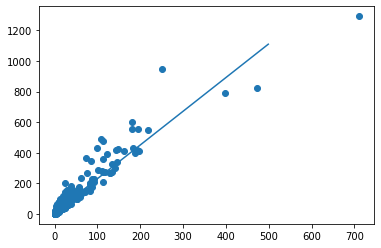

In [126]:
x = np.arange( 0,500,1)
plt.scatter(data["G"],data["PTS"])
plt.plot(x,y(x))

## **Residual Distance**

*A* residual is the vertical distance between a data point and the regression line. They are positive if they are above the regression line and negative if theyare below the regression line.

**MOTTO**: Our job is to minimize the residual distance and get the most effective linear line among the distributed data.

Let's find the sum of the residuals

In [127]:
s = 0
for i in range (0,len(data["G"])):
    s = s+y(data["G"][i])-data["Rk"][i]

In [128]:
print(s) #our motto is to get the minimal value 

-95645.00000000013


In [129]:
square = 0
for i in range (0,len(data["G"])):
    square = square+(y(data["G"][i])-data["Rk"][i])**2

In [130]:
square

36796344.77459613

# Nonlinear Regression
<br>
Nonlinear Regression models work just like the linear regression models as we look over the fundamentals. We are given with n data pairs. <br>
So, Non-Linear regression is a type of polynomial regression. It is simply a method to model a non linear relationship between the dependent and independent variables. It is used in place when the data shows a curvy trend.

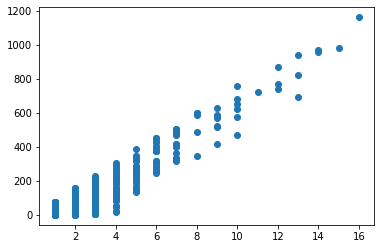

In [134]:
plt.scatter(data["Yrs"],data["GP"])

Now, let's perform some computations. Let's do some calculations and print a matrix from it


In [133]:
x = sum(data['Yrs'])
x2 = squareAndSum(data['Yrs'],data['Yrs'])
x3 = squareAndSum(data['Yrs']**2,data['Yrs'])
x4 = squareAndSum(data['Yrs']**3,data['Yrs'])

matrix = [[n,x,x2,sum(data['GP'])]
          ,[x,x2,x3,squareAndSum(data['Yrs'],data['GP'])]
          ,[x2,x3,x4,squareAndSum(data['Yrs']**2,data['GP'])]
          ]

In [61]:
matrix

[[499, 1410, 7190, 61007],
 [1410, 7190, 56352, 390159],
 [7190, 56352, 566234, 3422119]]

gauss Jordan 

In [78]:
import math
import numpy as np
import scipy.linalg as la

def addingRows(matrix, row, modifyrow,n):
  newRow = matrix[row, :] + n*matrix[modifyrow, :]
  newMatrix = []
  for i in range(len(matrix)): 
    if i != row:
      newMatrix.append(newRow)
    else:
        newMatrix.append(matrix[i,:])
        return np.array(newMatrix)


def toLeadingOne(matrix,row,column):
  newMatrix =[]
  for i in range(len(matrix)):
    if i != row:
      newMatrix.append(matrix[i,:])
    else:
      newMatrix.append(1/matrix[row,column]*matrix[row,:])
  return np.array(newMatrix)


def gaussJordan(matrix):
  newMatrix = matrix
  for pivot in range(len(matrix)):
    newMatrix = toLeadingOne(newMatrix,pivot,pivot)
    for column in range(0,pivot):
      newMatrix = addRows(newMatrix,column,pivot,-newMatrix[column,pivot])
    for column in range(pivot+1,len(matrix)):
      newMatrix = addingRows(newMatrix,column,pivot,-newMatrix[column,pivot])
  return newMatrix


In [80]:
gaussJordan(np.array(matrix))

IndexError: ignored

In [81]:
def rowCreator(input,order):
  row = []
  for i in range(order+1):
    row.append(input**i)
  return row

def matrixCreator(list, order):
  matrix = []
  for i in list:
    matrix.append(rowCreator(i,order))
  return matrix

In [82]:
A = np.array(matrixCreator(data['Yrs'],2))
y = np.array(data['GP'])

In [ ]:
np.linalg.inv(np.transpose(A)@ A)@ np.transpose(A)@ y
#here we have our formatted answer

Let's graph the above data

In [84]:
results = np.linalg.inv(np.transpose(A)@ A)@ np.transpose(A)@ y

def quadRegression(x):
  return results[0]+x*results[1]+results[2]*x**2

*Let*'s graph the above data

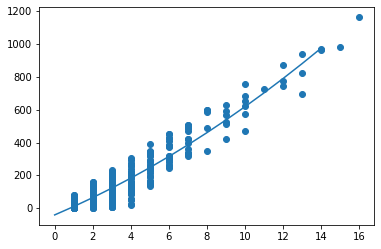

In [135]:
x = np.arange( 0,15,1)
plt.scatter(data["Yrs"],data["GP"])
plt.plot(x,quadRegression(x))